In [2]:
setwd('/import/GSE213982_fel/')

In [3]:
getwd()

[1] "/import/GSE213982_fel"

In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [5]:
immune.combined = readRDS('./female.rds')

In [6]:
immune.combined[["percent.mt"]] <- PercentageFeatureSet(immune.combined,pattern = "^MT-")

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
"All cells have the same value of percent.mt."


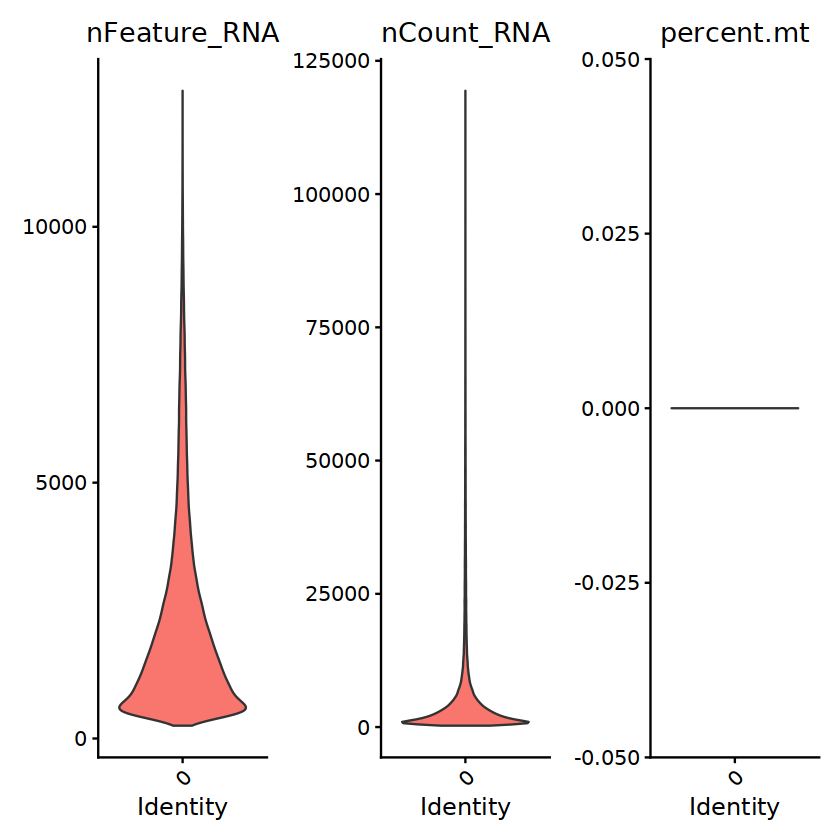

In [7]:
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

In [8]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [9]:
ggsave('figure1.pdf',height =  4,width = 6)

In [10]:
table(immune.combined$sample)


   F1    F2    F3    F4    F5    F6    F7    F8    F9   F10   F11   F12   F13 
 3864  1843  2211  5599  6413   512   516  2655  1639  2147  2405  1948  1360 
  F14   F15   F16   F17   F18   F19   F20   F21   F22   F23   F24   F25   F26 
 3453  3454   571  5671   849   942  1045  1215   957   972  1053  2756   957 
  F27   F28   F29   F30   F31   F32   F33   F34   F35   F36   F37   F38    M1 
  846  1250  2136   748  1261  1351  4110  2483  4583  3266   954  1658  2863 
   M2    M3    M4    M5    M6    M7    M8    M9   M10   M11   M12   M13   M14 
 2038  1388  2428  1307  2665  2264  1926  1320  2530  3901  2169  2182  1838 
  M15   M16   M17   M18   M19   M20   M21   M22   M23   M24 M24_2   M26   M27 
 3815  1274  3579  1560  2579  4430  2175  2121  4059   691   672  1944  1201 
  M28   M29   M30   M31   M32   M33   M34 
 2389  2087  2237  3305  2566  2363  3192 

In [11]:
scRNA = immune.combined

In [11]:
Idents(scRNA) = 'celltype'

sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)



### https://zhuanlan.zhihu.com/p/573321126
## https://zhuanlan.zhihu.com/p/594345612


Calculating cluster Ast

Calculating cluster End

Calculating cluster ExN

Calculating cluster InN

Calculating cluster Mic

Calculating cluster Mix

Calculating cluster OPC

Calculating cluster Oli

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




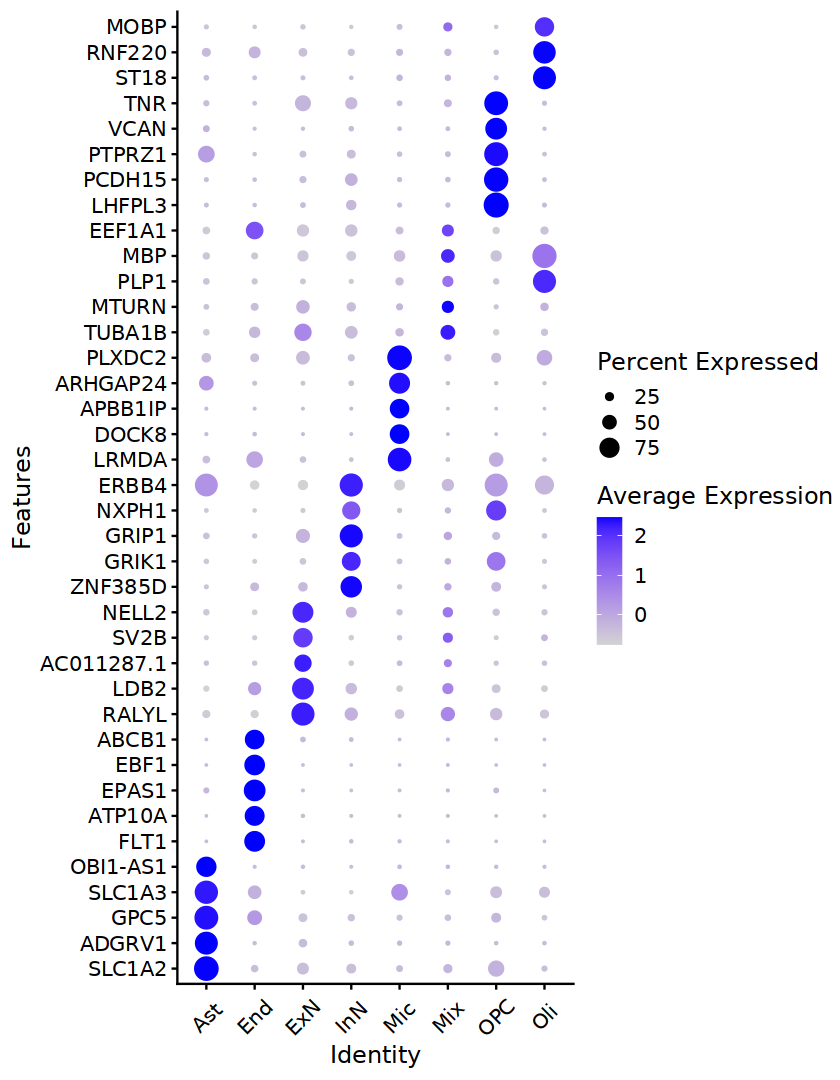

In [12]:
options(repr.plot.height = 9,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [13]:
ggsave('figure7.pdf',height =  9,width = 8)

In [14]:
library('clusterProfiler')



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [15]:
library(org.Hs.eg.db)

Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following object is masked from 'package:SeuratObject':

    intersect


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Warning message:
"pac

In [21]:
library(dplyr) 
top50 <- sce.markers %>% group_by(cluster) %>% top_n(100, avg_log2FC)

group <- data.frame(gene=top50$gene,
                    group=top50$cluster)

Gene_ID <- bitr(top50$gene, fromType="SYMBOL", 
            toType="ENTREZID", 
            OrgDb="org.Hs.eg.db")
data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
data_GO <- compareCluster(
  ENTREZID~group, 
  data=data, 
  fun="enrichGO", 
  OrgDb="org.Hs.eg.db",
  ont = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff = 0.05,
  qvalueCutoff = 0.05,
  readable = TRUE
)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(top50$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"4.73% of input gene IDs are fail to map..."


In [23]:
data_GO_sim <- simplify(data_GO, 
                        cutoff=0.5, 
                        by="p.adjust", 
                        select_fun=max)

write.csv(data_GO_sim@compareClusterResult,file = 'enrichment.csv',row.names =F)

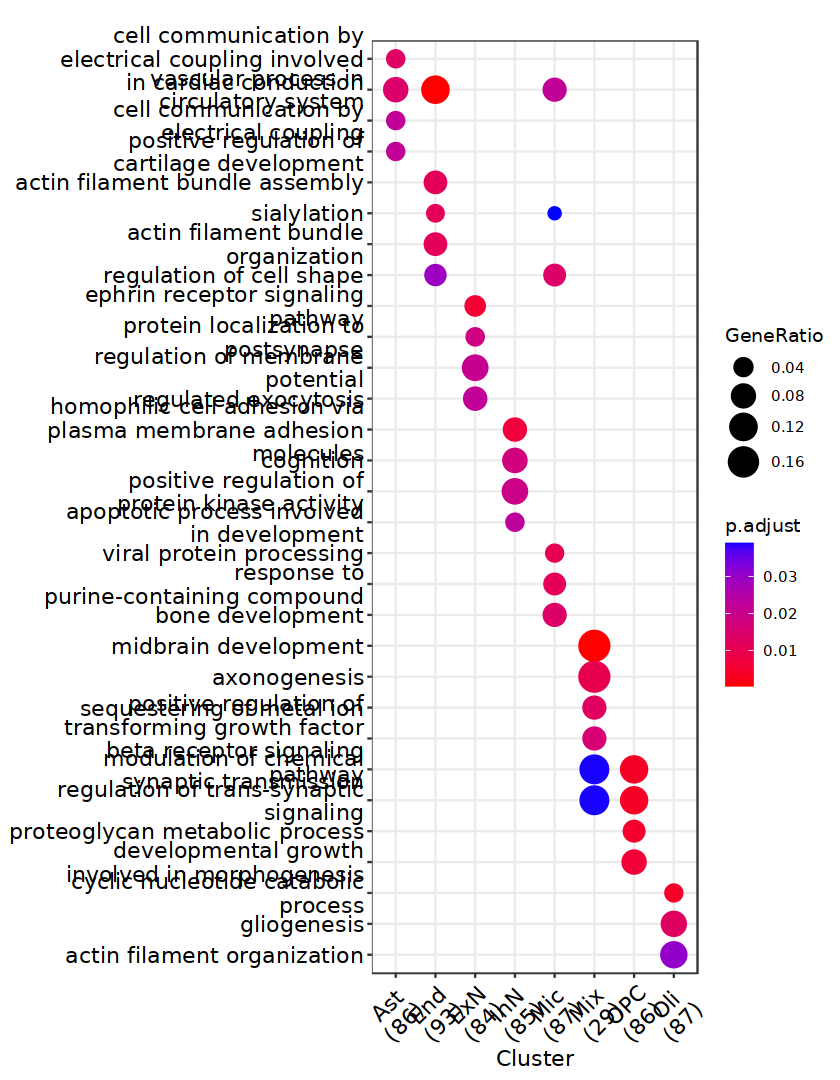

In [30]:
options(repr.plot.height = 9,repr.plot.width = 7)
enrichplot::dotplot(data_GO_sim, showCategory=4,font.size = 13)+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [31]:
ggsave('figure8.pdf',height =  15,width = 8)

In [32]:
saveRDS(immune.combined,file = 'female.rds')